In [1]:
# Import Dependencies
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint
import scipy.stats as st
from scipy import stats

In [2]:
# Read in education vs income csv
main_df = pd.read_csv("education_vs_per_capita_income.csv")
main_df.head()

,county_FIPS,state,county,per_capita_personal_income_2019,per_capita_personal_income_2020,per_capita_personal_income_2021,associate_degree_numbers_2016_2020,bachelor_degree_numbers_2016_2020,associate_degree_percentage_2016_2020,bachelor_degree_percentage_2015_2019
0,51013,VA,"Arlington, VA",97629,100687,107603,19573,132394,11.21,75.84
1,35028,NM,"Los Alamos, NM",72366,75949,81306,2766,9098,20.54,67.56
2,8013,CO,"Boulder, CO",79698,83173,89593,45834,135876,21.24,62.97
3,24027,MD,"Howard, MD",78013,82041,86380,42538,136792,19.49,62.67
4,36061,NY,"New York, NY",173525,175327,195543,167960,777483,13.43,62.18


In [3]:
# Read in Cost of Living csv
COL_df = pd.read_csv("Cost_of_Living_Index_Data.csv")
COL_df.head()

,fips,state,densityMi,pop2023,pop2022,pop2020,pop2019,pop2010,growthRate,growth,growthSince2010,costIndex,groceryCost,housingCost,utilitiesCost,transportationCost,miscCost
0,28,Mississippi,63.07084,2959473,2960075,2961279,2961879,2967297,-0.00020,-602,-0.00264,83.3,92.2,66.3,90.4,86.7,91.4
1,20,Kansas,36.24443,2963308,2954832,2937880,2929402,2853118,0.00287,8476,0.03862,86.5,91.7,72.6,100.2,97.3,90.3
2,1,Alabama,100.65438,5097641,5073187,5024279,4999822,4779736,0.00482,24454,0.06651,87.9,98.2,70.1,100.7,92.7,94.1
3,40,Oklahoma,58.63041,4021753,4000953,3959353,3938551,3751351,0.00520,20800,0.07208,87.9,94.5,74.7,95.1,94.8,93.5
4,13,Georgia,191.59470,11019186,10916760,10711908,10609487,9687653,0.00938,102426,0.13745,88.8,95.9,74.4,90.5,92.6,96.6


In [4]:
# Dictionary containing state name and abbreviation
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}

In [5]:
# replace the full name of the state w/ the abbrev in the COL df
new_COL_df = COL_df.replace({"state": us_state_to_abbrev})

In [6]:
new_COL_df.head()

,fips,state,densityMi,pop2023,pop2022,pop2020,pop2019,pop2010,growthRate,growth,growthSince2010,costIndex,groceryCost,housingCost,utilitiesCost,transportationCost,miscCost
0,28,MS,63.07084,2959473,2960075,2961279,2961879,2967297,-0.00020,-602,-0.00264,83.3,92.2,66.3,90.4,86.7,91.4
1,20,KS,36.24443,2963308,2954832,2937880,2929402,2853118,0.00287,8476,0.03862,86.5,91.7,72.6,100.2,97.3,90.3
2,1,AL,100.65438,5097641,5073187,5024279,4999822,4779736,0.00482,24454,0.06651,87.9,98.2,70.1,100.7,92.7,94.1
3,40,OK,58.63041,4021753,4000953,3959353,3938551,3751351,0.00520,20800,0.07208,87.9,94.5,74.7,95.1,94.8,93.5
4,13,GA,191.59470,11019186,10916760,10711908,10609487,9687653,0.00938,102426,0.13745,88.8,95.9,74.4,90.5,92.6,96.6


In [7]:
# create a new df with only the state and costIndex columns
state_COL_df = new_COL_df[["state","costIndex"]]

In [8]:
state_COL_df.head()

,state,costIndex
0,MS,83.3
1,KS,86.5
2,AL,87.9
3,OK,87.9
4,GA,88.8


In [9]:
# merge our datasets on the state
merged_df = main_df.merge(state_COL_df, on="state")

In [10]:
# verifying that we did not loose any rows
merged_df.count()

county_FIPS                              3006
state                                    3006
county                                   3006
per_capita_personal_income_2019          3006
per_capita_personal_income_2020          3006
per_capita_personal_income_2021          3006
associate_degree_numbers_2016_2020       3006
bachelor_degree_numbers_2016_2020        3006
associate_degree_percentage_2016_2020    3006
bachelor_degree_percentage_2015_2019     3006
costIndex                                3006
dtype: int64

In [11]:
merged_df.head()

,county_FIPS,state,county,per_capita_personal_income_2019,per_capita_personal_income_2020,per_capita_personal_income_2021,associate_degree_numbers_2016_2020,bachelor_degree_numbers_2016_2020,associate_degree_percentage_2016_2020,bachelor_degree_percentage_2015_2019,costIndex
0,51013,VA,"Arlington, VA",97629,100687,107603,19573,132394,11.21,75.84,101.8
1,51107,VA,"Loudoun, VA",82681,85568,90254,52006,160853,19.92,61.62,101.8
2,51087,VA,"Henrico, VA",68826,69938,74650,60829,101632,26.49,44.26,101.8
3,51075,VA,"Goochland, VA",104892,106031,110781,4586,7705,26.07,43.81,101.8
4,51179,VA,"Stafford, VA",56078,58744,62954,28316,39872,29.36,41.35,101.8


In [12]:
# creating a column for Adjusted Income
merged_df["Adjusted Per Capita Personal Income 2021"] = \
round(merged_df["per_capita_personal_income_2021"] / (merged_df["costIndex"]/100),2)

In [13]:
merged_df.head()

,county_FIPS,state,county,per_capita_personal_income_2019,per_capita_personal_income_2020,per_capita_personal_income_2021,associate_degree_numbers_2016_2020,bachelor_degree_numbers_2016_2020,associate_degree_percentage_2016_2020,bachelor_degree_percentage_2015_2019,costIndex,Adjusted Per Capita Personal Income 2021
0,51013,VA,"Arlington, VA",97629,100687,107603,19573,132394,11.21,75.84,101.8,105700.39
1,51107,VA,"Loudoun, VA",82681,85568,90254,52006,160853,19.92,61.62,101.8,88658.15
2,51087,VA,"Henrico, VA",68826,69938,74650,60829,101632,26.49,44.26,101.8,73330.06
3,51075,VA,"Goochland, VA",104892,106031,110781,4586,7705,26.07,43.81,101.8,108822.20
4,51179,VA,"Stafford, VA",56078,58744,62954,28316,39872,29.36,41.35,101.8,61840.86


In [14]:
merged_df.columns

Index(['county_FIPS', 'state', 'county', 'per_capita_personal_income_2019',
       'per_capita_personal_income_2020', 'per_capita_personal_income_2021',
       'associate_degree_numbers_2016_2020',
       'bachelor_degree_numbers_2016_2020',
       'associate_degree_percentage_2016_2020',
       'bachelor_degree_percentage_2015_2019', 'costIndex',
       'Adjusted Per Capita Personal Income 2021'],
      dtype='object')

In [15]:
# take out columns that wont be used
final_df = merged_df[["state","county","per_capita_personal_income_2021","associate_degree_numbers_2016_2020",\
                     "bachelor_degree_numbers_2016_2020","associate_degree_percentage_2016_2020","bachelor_degree_percentage_2015_2019",\
                     "costIndex","Adjusted Per Capita Personal Income 2021"]].copy()

In [16]:
final_df.head()

,state,county,per_capita_personal_income_2021,associate_degree_numbers_2016_2020,bachelor_degree_numbers_2016_2020,associate_degree_percentage_2016_2020,bachelor_degree_percentage_2015_2019,costIndex,Adjusted Per Capita Personal Income 2021
0,VA,"Arlington, VA",107603,19573,132394,11.21,75.84,101.8,105700.39
1,VA,"Loudoun, VA",90254,52006,160853,19.92,61.62,101.8,88658.15
2,VA,"Henrico, VA",74650,60829,101632,26.49,44.26,101.8,73330.06
3,VA,"Goochland, VA",110781,4586,7705,26.07,43.81,101.8,108822.20
4,VA,"Stafford, VA",62954,28316,39872,29.36,41.35,101.8,61840.86


In [17]:
# creating a dictionary to rename columns
Column_dict = {"per_capita_personal_income_2021":"Per Capita Income 2021",
               "associate_degree_numbers_2016_2020":"Count of Associate Degrees",
               "bachelor_degree_numbers_2016_2020":"Count of Bachelor Degrees",
               "associate_degree_percentage_2016_2020":"Percent of Associate Degrees",
               "bachelor_degree_percentage_2015_2019":"Percent of Bachelor Degrees"
              }

In [18]:
# renaming columns
final_df.rename(columns = Column_dict, inplace=True)

In [19]:
final_df.head()

,state,county,Per Capita Income 2021,Count of Associate Degrees,Count of Bachelor Degrees,Percent of Associate Degrees,Percent of Bachelor Degrees,costIndex,Adjusted Per Capita Personal Income 2021
0,VA,"Arlington, VA",107603,19573,132394,11.21,75.84,101.8,105700.39
1,VA,"Loudoun, VA",90254,52006,160853,19.92,61.62,101.8,88658.15
2,VA,"Henrico, VA",74650,60829,101632,26.49,44.26,101.8,73330.06
3,VA,"Goochland, VA",110781,4586,7705,26.07,43.81,101.8,108822.20
4,VA,"Stafford, VA",62954,28316,39872,29.36,41.35,101.8,61840.86


In [20]:
# using the group by to find the averages by state
state_avgs = final_df.groupby(["state"]).mean()

In [21]:
# finding correlation coefficient
(slope, interecept,rvalue,pvalue,stderr) = stats.linregress(state_avgs["Percent of Associate Degrees"],state_avgs["Adjusted Per Capita Personal Income 2021"])
y_pred = slope*state_avgs["Percent of Associate Degrees"]+interecept

R-Squared is 0.025058636466901048


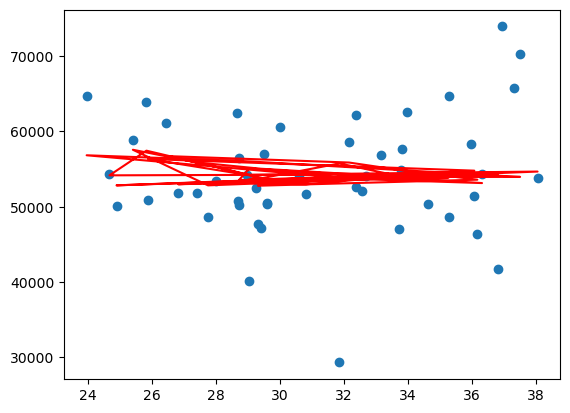

In [30]:
plt.scatter(state_avgs["Percent of Associate Degrees"],state_avgs["Adjusted Per Capita Personal Income 2021"])
plt.plot(state_avgs["Percent of Associate Degrees"],y_pred,color="red")
print(f'R-Squared is {rvalue**2}')
plt.show()

In [28]:
(slope, interecept,rvalue,pvalue,stderr) = stats.linregress(state_avgs["Percent of Bachelor Degrees"],state_avgs["Adjusted Per Capita Personal Income 2021"])
y_pred = slope*state_avgs["Percent of Bachelor Degrees"]+interecept

R-Squared is 0.025058636466901048


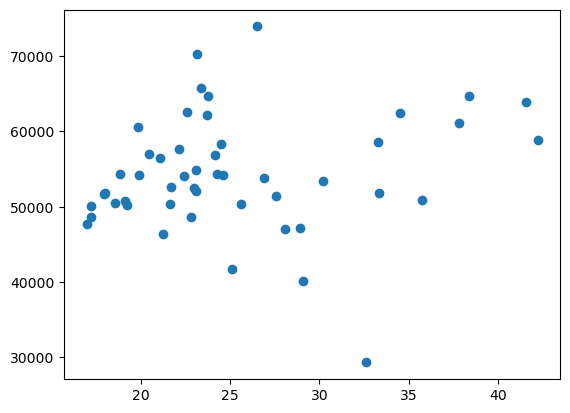

In [29]:
plt.scatter(state_avgs["Percent of Bachelor Degrees"],state_avgs["Adjusted Per Capita Personal Income 2021"])
print(f'R-Squared is {rvalue**2}')
plt.show()